In [2]:
import os
import sys
import arrow as ar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyplotz.pyplotz import PyplotZ
from palettable.colorbrewer.sequential import Blues_9,Blues_8, BuGn_9, Greys_3, PuRd_5
import warnings
warnings.filterwarnings('ignore')

from src.dataloader import Dataloader


plt.style.use('fivethirtyeight')
pltz = PyplotZ()
data_loader = Dataloader()
data_loader.load_file()
ori_data = data_loader.ori_data
data = data_loader.data

In [3]:
data_num = len(ori_data)
unique_data_num = len(data)
print('共有{}条数据，非重复条目{}条，重复条目{}条'.format(data_num,unique_data_num,data_num-unique_data_num))
print('标签比例为1:{}'.format(len(data[data['is_trade']==0])/len(data[data['is_trade']==1])))


共有478138条数据，非重复条目478063条，重复条目75条
标签比例为1:52.159457355721116


In [4]:
item_num = len(data['item_id'].unique())
user_num = len(data['user_id'].unique())
shop_num = len(data['shop_id'].unique())
print('有{}个不同的商品，来自{}个不同的店铺，广告推送给{}个不同的用户'.format(item_num,shop_num,user_num))

有10074个不同的商品，来自3958个不同的店铺，广告推送给197677个不同的用户


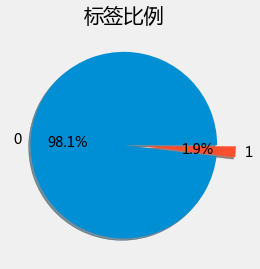

In [5]:
pie_plot = data['is_trade'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)
pie_plot.set_title('标签比例')
pie_plot.set_ylabel('')
plt.show()

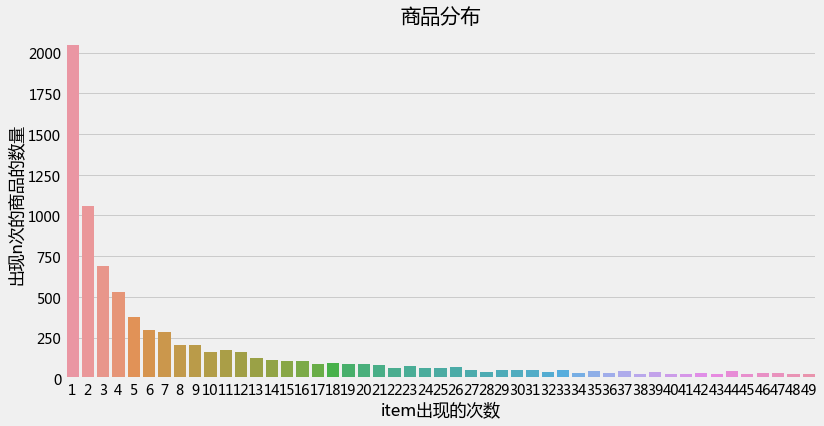

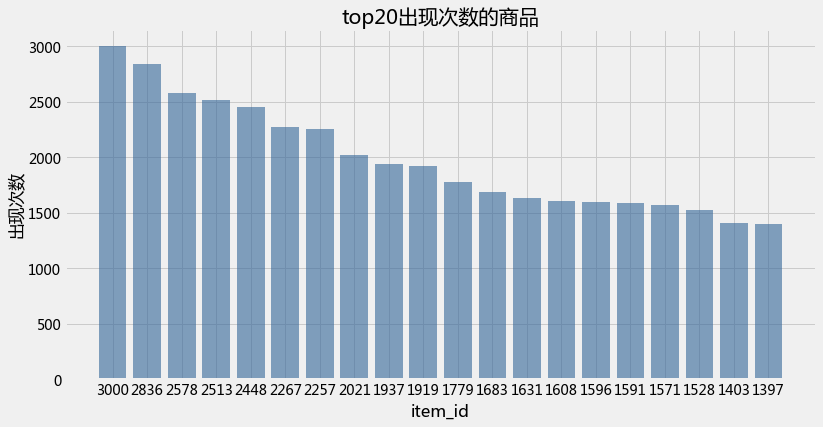

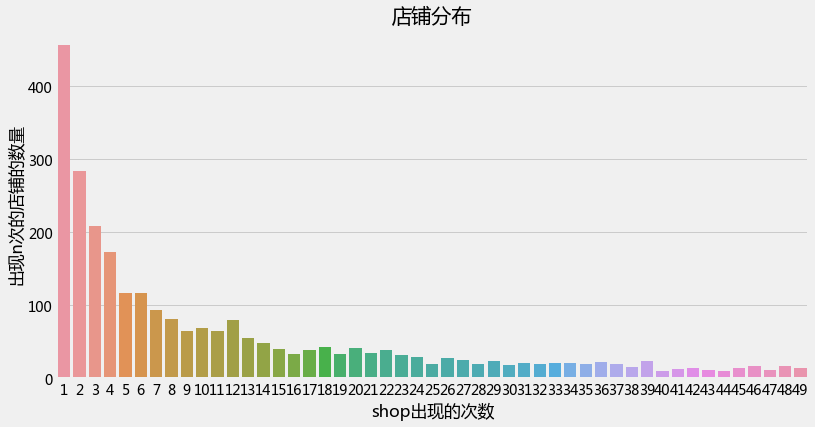

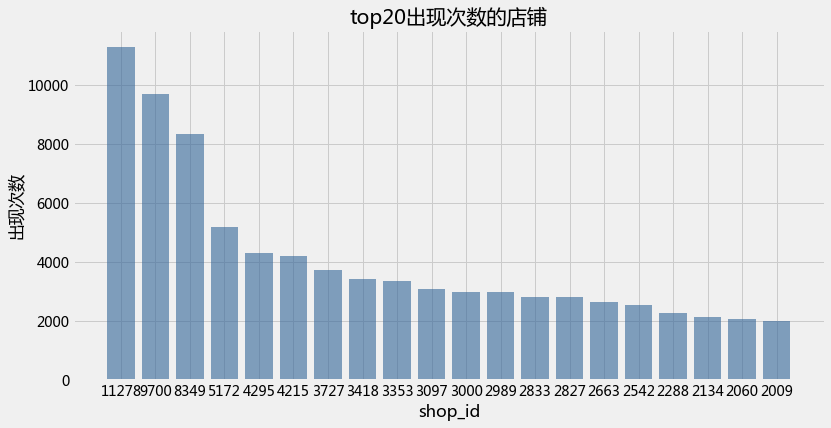

In [6]:
fig, axis1 = plt.subplots(1,1,figsize=(12,6))
item_num=pd.DataFrame({'item_id_num':data['item_id'].value_counts().values})
sns.countplot(x='item_id_num',data=item_num[item_num['item_id_num']<50])
axis1.set_xlabel('item出现的次数')
axis1.set_ylabel('出现n次的商品的数量')
axis1.set_title('商品分布')

fig, axis1 = plt.subplots(1,1,figsize=(12,6))
item_value=pd.DataFrame(data.item_id.value_counts()).reset_index().head(20)
axis1.set_xlabel('item_id')
axis1.set_ylabel('出现次数')
axis1.set_title('top20出现次数的商品')
y_pos = np.arange(len(item_value))

plt.bar(y_pos, item_value['item_id'], color=(0.2, 0.4, 0.6, 0.6))
pltz.xticks(y_pos, item_value['item_id'])

pltz.show()

fig, axis1 = plt.subplots(1,1,figsize=(12,6))
shop_num=pd.DataFrame({'shop_id_num':data['shop_id'].value_counts().values})
sns.countplot(x='shop_id_num',data=shop_num[shop_num['shop_id_num']<50])
axis1.set_xlabel('shop出现的次数')
axis1.set_ylabel('出现n次的店铺的数量')
axis1.set_title('店铺分布')

fig, axis1 = plt.subplots(1,1,figsize=(12,6))
shop_value=pd.DataFrame(data.shop_id.value_counts()).reset_index().head(20)
axis1.set_xlabel('shop_id')
axis1.set_ylabel('出现次数')
axis1.set_title('top20出现次数的店铺')
y_pos = np.arange(len(shop_value))

plt.bar(y_pos, shop_value['shop_id'], color=(0.2, 0.4, 0.6, 0.6))
pltz.xticks(y_pos, shop_value['shop_id'])

pltz.show()

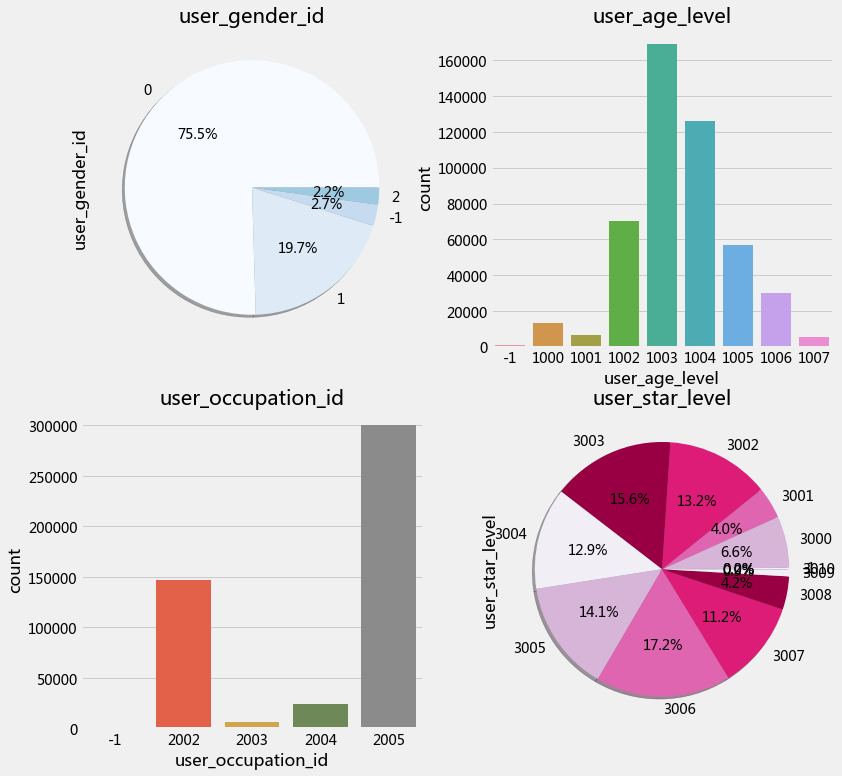

In [7]:
f,ax=plt.subplots(2,2,figsize=(12,12))
data['user_gender_id'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0][0],shadow=True,colors=Blues_8.hex_colors)
ax[0][0].set_title('user_gender_id')

sns.countplot('user_age_level',data=data,ax=ax[0][1])
ax[0][1].set_title('user_age_level')

sns.countplot('user_occupation_id',data=data,ax=ax[1][0])
ax[1][0].set_title('user_occupation_id')

data['user_star_level'].value_counts().sort_index().plot.pie(autopct='%1.1f%%',ax=ax[1][1],shadow=True,colors=PuRd_5.hex_colors)
ax[1][1].set_title('user_star_level')

plt.show()


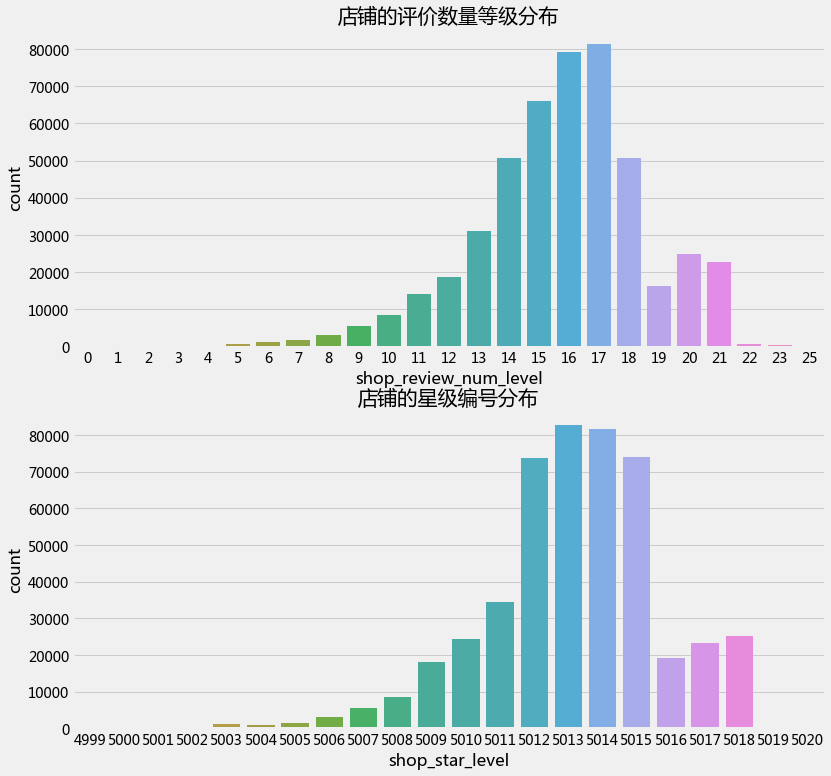

In [8]:
f,ax=plt.subplots(2,1,figsize=(12,12))
sns.countplot('shop_review_num_level',data=data,ax=ax[0])
ax[0].set_title('店铺的评价数量等级分布')

sns.countplot('shop_star_level',data=data,ax=ax[1])
ax[1].set_title('店铺的星级编号分布')
plt.show()

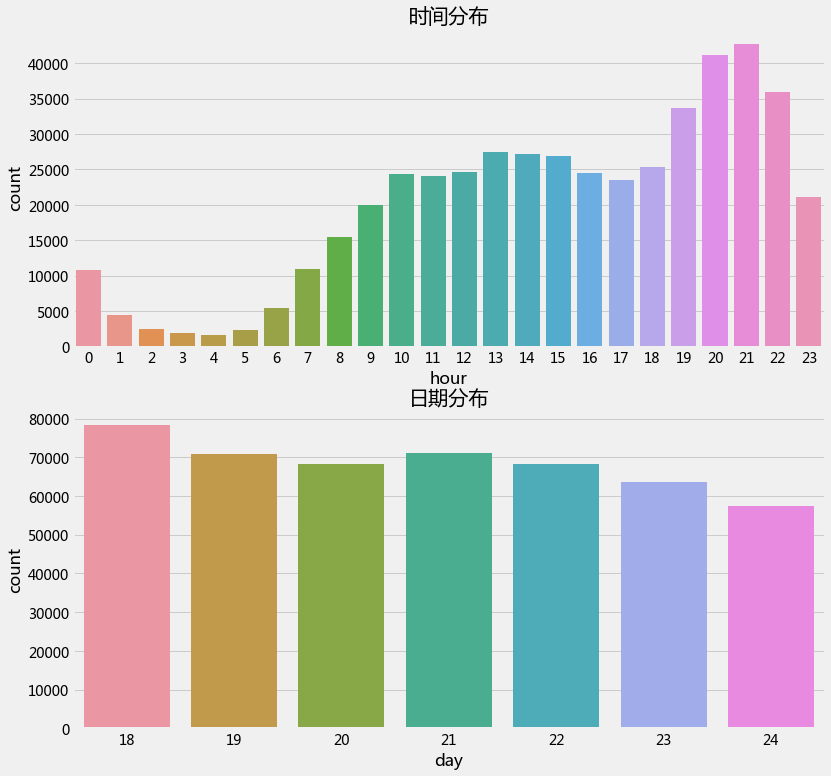

In [9]:
f,ax=plt.subplots(2,1,figsize=(12,12))
sns.countplot('hour',data=data,ax=ax[0])
ax[0].set_title('时间分布')

sns.countplot('day',data=data,ax=ax[1])
ax[1].set_title('日期分布')
plt.show()


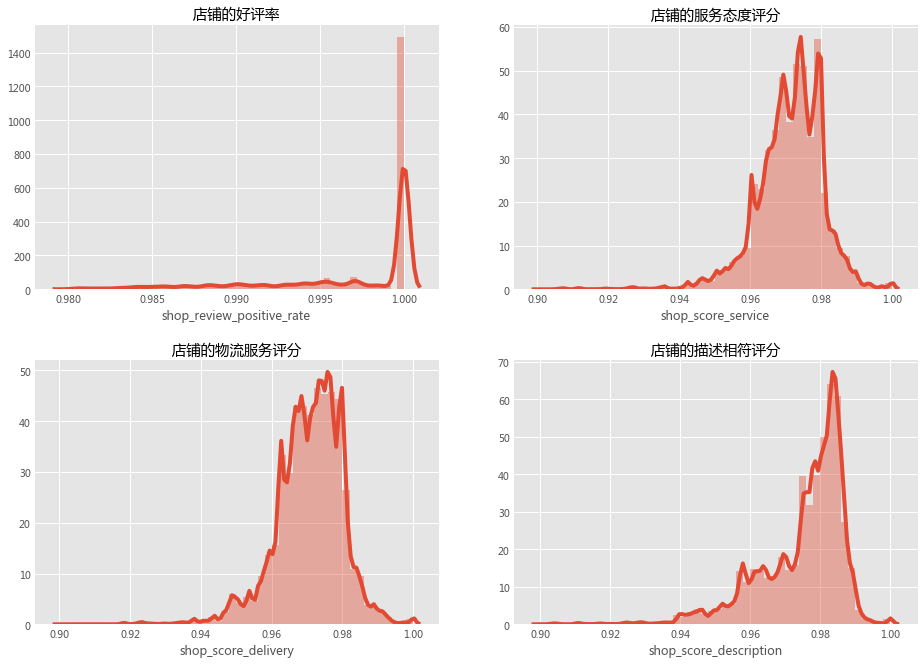

In [10]:
plt.style.use('ggplot')
f,ax=plt.subplots(2,2,figsize=(14,10))
plt.tight_layout(5)
# sns.boxplot(y=data['shop_review_positive_rate'][data['shop_review_positive_rate']!=-1],ax=ax[0][0])
sns.distplot(data['shop_review_positive_rate'][data['shop_review_positive_rate']>0.98],ax=ax[0][0])
ax[0][0].set_title('店铺的好评率')


# sns.boxplot(y=data['shop_score_service'][data['shop_score_service']!=-1],ax=ax[1][0])
sns.distplot(data['shop_score_service'][data['shop_score_service']>0.9],ax=ax[0][1])
ax[0][1].set_title('店铺的服务态度评分')


# sns.boxplot(y=data['shop_score_delivery'][data['shop_score_delivery']!=-1],ax=ax[2][0])
sns.distplot(data['shop_score_delivery'][data['shop_score_delivery']>0.9],ax=ax[1][0])
ax[1][0].set_title('店铺的物流服务评分')


# sns.boxplot(y=data['shop_score_description'][data['shop_score_description']!=-1],ax=ax[3][0])
sns.distplot(data['shop_score_description'][data['shop_score_description']>0.9],ax=ax[1][1])
ax[1][1].set_title('店铺的描述相符评分')
plt.show()

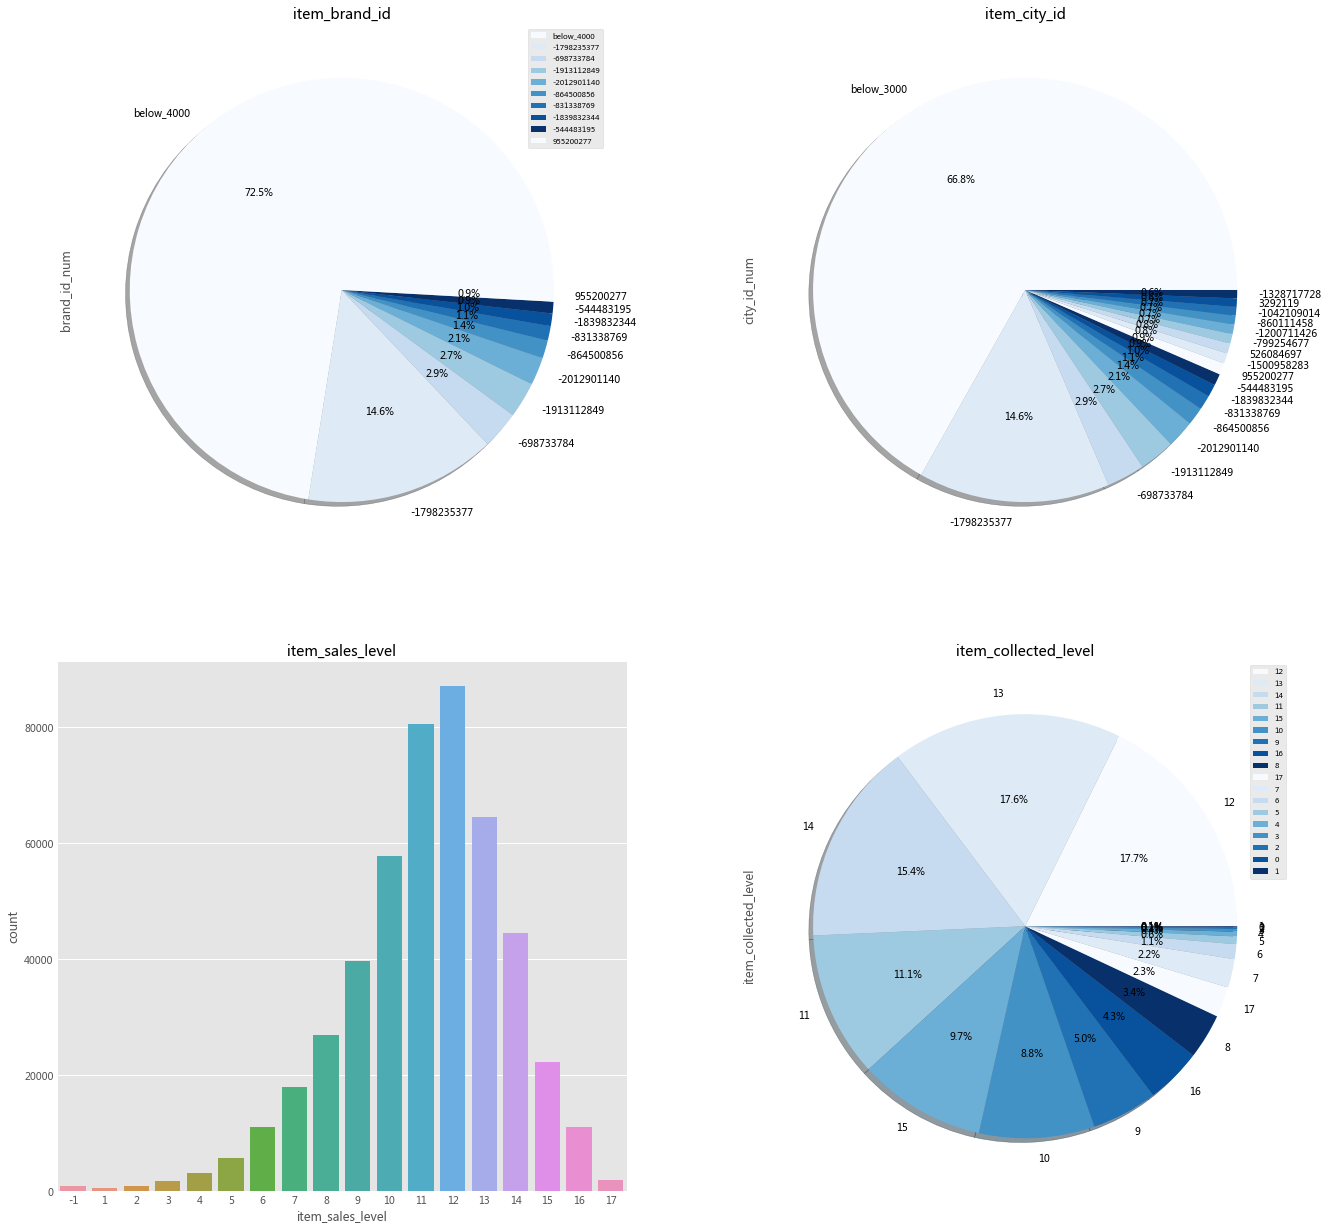

In [11]:
f,ax=plt.subplots(2,2,figsize=(20,20))

item_brand_id_num=pd.DataFrame({'brand_id_num':data['item_brand_id'].value_counts()}).reset_index()
brand_value=pd.DataFrame({'brand_id_num':item_brand_id_num['brand_id_num'][item_brand_id_num['brand_id_num']<4000].sum()},index=[0])
brand_value['index']='below_4000'
brand_value=pd.concat([brand_value,item_brand_id_num[item_brand_id_num['brand_id_num']>=4000]])
pd.Series(data=brand_value.set_index('index')['brand_id_num']).plot.pie(autopct='%1.1f%%',ax=ax[0][0],shadow=True,colors=Blues_9.hex_colors)
ax[0][0].set_title('item_brand_id')
ax[0][0].legend(fontsize=7.5)
#sns.countplot('item_city_id',data=data,ax=ax[0][1])


item_city_id_num=pd.DataFrame({'city_id_num':data['item_brand_id'].value_counts()}).reset_index()
city_value=pd.DataFrame({'city_id_num':item_city_id_num['city_id_num'][item_city_id_num['city_id_num']<3000].sum()},index=[0])
city_value['index']='below_3000'
city_value=pd.concat([city_value,item_city_id_num[item_brand_id_num['brand_id_num']>=3000]])
pd.Series(data=city_value.set_index('index')['city_id_num']).plot.pie(autopct='%1.1f%%',ax=ax[0][1],shadow=True,colors=Blues_9.hex_colors)
ax[0][1].set_title('item_city_id')

sns.countplot('item_sales_level',data=data,ax=ax[1][0])
ax[1][0].set_title('item_sales_level')

data['item_collected_level'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1][1],shadow=True,colors=Blues_9.hex_colors)
ax[1][1].set_title('item_collected_level')
ax[1][1].legend(fontsize=7.5)
plt.show()

In [12]:
size = len(data['item_id'].unique())
temp_data = data.drop_duplicates('item_id')
for col in data_loader.item_column:
    num = len(temp_data[temp_data[col] == -1])
    print('{}: {}/{} = {}'.format(col, num, size, num/size))
print()

size = len(data['user_id'].unique())
temp_data = data.drop_duplicates('user_id')
for col in data_loader.user_column:
    num = len(temp_data[temp_data[col] == -1])
    print('{}: {}/{} = {}'.format(col, num, size, num/size))
print()
 
size = len(data['context_id'].unique())
temp_data = data.drop_duplicates('context_id')
for col in data_loader.context_column:
    num = len(temp_data[temp_data[col] == -1])
    print('{}: {}/{} = {}'.format(col, num, size, num/size))
print()
 
size = len(data['shop_id'].unique())
temp_data = data.drop_duplicates('shop_id')
for col in data_loader.shop_column:
    num = len(temp_data[temp_data[col] == -1])
    print('{}: {}/{} = {}'.format(col, num, size, num/size))
print()

item_id: 0/10074 = 0.0
item_category_list: 0/10074 = 0.0
item_brand_id: 64/10074 = 0.006352987889616835
item_city_id: 22/10074 = 0.002183839587055787
item_price_level: 0/10074 = 0.0
item_sales_level: 236/10074 = 0.02342664284296208
item_collected_level: 0/10074 = 0.0
item_pv_level: 0/10074 = 0.0

user_id: 0/197677 = 0.0
user_gender_id: 5504/197677 = 0.02784340110382088
user_age_level: 439/197677 = 0.0022207945284479225
user_occupation_id: 439/197677 = 0.0022207945284479225
user_star_level: 439/197677 = 0.0022207945284479225

context_id: 0/478043 = 0.0
context_timestamp: 0/478043 = 0.0
context_page_id: 0/478043 = 0.0
predict_category_property: 0/478043 = 0.0

shop_id: 0/3958 = 0.0
shop_review_num_level: 0/3958 = 0.0
shop_review_positive_rate: 5/3958 = 0.0012632642748863063
shop_star_level: 0/3958 = 0.0
shop_score_service: 18/3958 = 0.004547751389590703
shop_score_delivery: 18/3958 = 0.004547751389590703
shop_score_description: 18/3958 = 0.004547751389590703

